# Linear Regression - Simple Linear Regression

##### Ref: 1041001

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [5]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


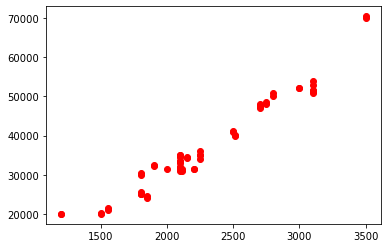

In [6]:
plt.scatter(df.area, df.rent, color='red')

Text(0.5, 1.0, 'Rent in Bangladesh')

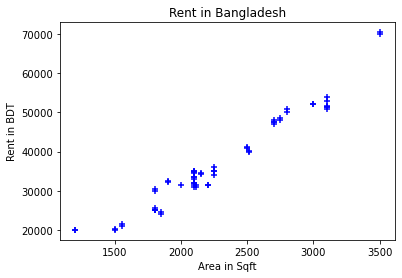

In [7]:
plt.scatter(df.area, df.rent, color='blue', marker='+')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent in BDT')
plt.title('Rent in Bangladesh', loc='center')

Text(0.5, 1.0, 'Rent in Bangladesh')

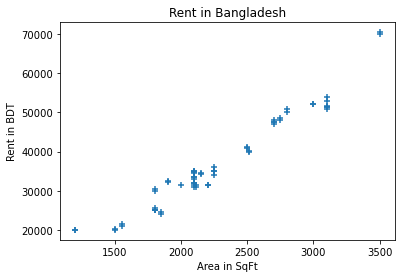

In [8]:
plt.scatter(df['area'] , df['rent'],marker='+')
plt.xlabel('Area in SqFt')
plt.ylabel('Rent in BDT')
plt.title('Rent in Bangladesh')

Text(0.0, 1.0, 'Rent in Bangladesh')

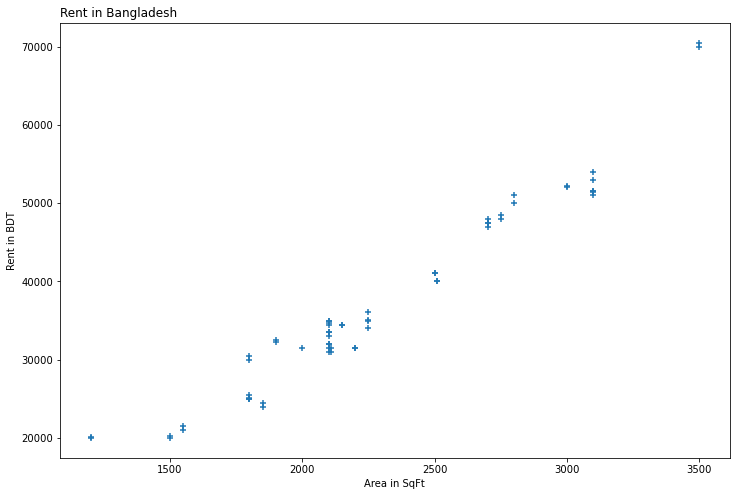

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(df['area'] , df['rent'],marker='+')
plt.xlabel('Area in SqFt')
plt.ylabel('Rent in BDT')
plt.title('Rent in Bangladesh', loc='left')

In [10]:
len(df.area)

60

## Variable Declaration

- Selecting Independent & Dependent variables

In [11]:
x = df[['area']] # Ind Var:: Alternative : x = df.drop('rent', axis=1)  # Feature always 2D [[]], otherwise it will return error
y = df['rent']  # Dep Var

In [12]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Split the data

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=1) # 30% data will be kept to testing

In [14]:
# data (60)  x                         [42+18 = 60]
print(f"Train Set Size(xtrain): ",xtrain.shape)    # 60 x .70 = 42
print(f"Test Set Size(xtest) : ",xtest.shape)      # 60 x .30 = 18

Train Set Size(xtrain):  (42, 1)
Test Set Size(xtest) :  (18, 1)


In [15]:
print (ytrain.shape)
print (ytest.shape)

(42,)
(18,)


In [16]:
xtrain.head()

,area
52,3500
19,2700
42,2100
56,2750
17,1550


In [17]:
ytrain.head()

52    70500
19    47000
42    34700
56    48500
17    21000
Name: rent, dtype: int64

In [18]:
xtest.head()

,area
39,2100
41,2100
2,2500
48,1800
50,2110


# Model

In [19]:
# Import Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
# Train / Fit the Model
lr.fit(xtrain, ytrain)   #train the ML model ; xtrain=x ; ytrain=y, for training xtrain & ytrain contain x & y values

LinearRegression()

In [21]:
lr.coef_

array([21.71038918])

In [22]:
lr.intercept_

-12534.955985461369

In [23]:
# y = mx + c   or  y = wx + b
m = lr.coef_
c = lr.intercept_

# Prediction

### Prediction by Formula / Manual Method  Y = MX + C

In [24]:
x = 1500   # any value can be passed
y = (m * x) + c
y

array([20030.62777778])

### Prediction Created Model / Function

In [25]:
lr.predict([[1500]])

array([20030.62777778])

In [26]:
# Rent Prediction on Full data regardless train & test  > there will be 60 prediction
lr.predict(df[['area']])

array([30885.82236552, 33056.86128307, 41741.01695327, 36313.4196594 ,
       52596.21154101, 28714.78344797, 20030.62777778, 27629.2639892 ,
       46083.09478837, 33056.86128307, 34142.38074185, 33056.86128307,
       33056.86128307, 41958.12084502, 36313.4196594 , 54767.25045856,
       26543.74453042, 21116.14723655, 26543.74453042, 46083.09478837,
       33273.96517483, 33056.86128307, 63451.40612876, 13517.51102513,
       48254.13370592, 54767.25045856, 47168.61424714, 26543.74453042,
       35227.90020062, 54767.25045856, 33056.86128307, 33056.86128307,
       41741.01695327, 36313.4196594 , 52596.21154101, 28714.78344797,
       20030.62777778, 27629.2639892 , 46083.09478837, 33056.86128307,
       34142.38074185, 33056.86128307, 33056.86128307, 41958.12084502,
       36313.4196594 , 54767.25045856, 26543.74453042, 21116.14723655,
       26543.74453042, 46083.09478837, 33273.96517483, 33056.86128307,
       63451.40612876, 13517.51102513, 48254.13370592, 54767.25045856,
      

In [27]:
df['Predicted Rent'] = lr.predict(df[['area']])
df.head()  # Actual Rent (rent) vs "Predicted Rent"

,area,rent,Predicted Rent
0,2000,31500,30885.822366
1,2100,35000,33056.861283
2,2500,41050,41741.016953
3,2250,36100,36313.419659
4,3000,52100,52596.211541


### Findings

- Now Differce between actual vs predited is to be considered as Error and when the total error calculated will be called as "COST"

In [28]:
# Prediction on test values (18 prediction)
lr.fit(xtest, ytest)
testing = lr.predict(xtest) # xtest actual return ytest
testing

array([33384.58154627, 33384.58154627, 41181.08890194, 27537.20102952,
       33579.49423016, 36308.27180465, 36308.27180465, 29486.32786844,
       34359.14496573, 27537.20102952, 47028.46941869, 15842.43999601,
       27537.20102952, 36308.27180465, 46053.90599923, 21689.82051277,
       33384.58154627, 34359.14496573])

In [29]:
# Actual test values (18 actual values)
ytest

# Testing Error = testing - ytest

39    31500
41    32020
2     41050
48    25500
50    31000
44    35000
33    35100
35    32300
40    34400
27    25000
24    50000
53    20100
46    30000
3     36100
26    48000
36    20200
21    33500
10    34500
Name: rent, dtype: int64

# Evaluation

#### MSE - Error Calcuatrion - Testing

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, lr.predict(xtest))
mse

4048209.6570558036

#### MAE - Error Calcuatrion - Testing

In [31]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(ytest, lr.predict(xtest))
mse

1638.753801153473

In [32]:
# Random Prediction
print (lr.predict([[3000]]))
print(lr.predict([[25000]]))

[50926.72309653]
[479734.62765833]


# Visualization- Best Fit Line

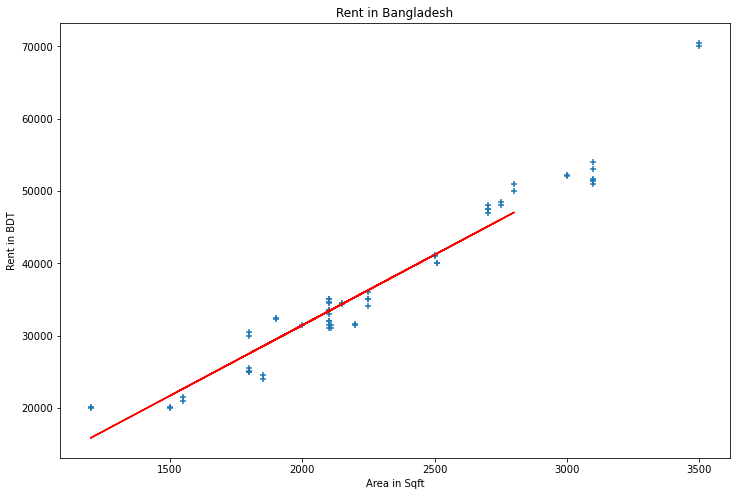

In [33]:
# Visualization with xtest data
plt.figure(figsize=(12,8))
plt.scatter(df['area'], df['rent'], marker='+')  # Actual
plt.plot(xtest, lr.predict(xtest), color='red')  # Prediction
plt.xlabel('Area in Sqft')
plt.ylabel('Rent in BDT')
plt.title('Rent in Bangladesh')
plt.show()

In [34]:
lr.predict([[3500]])

array([60672.35729111])

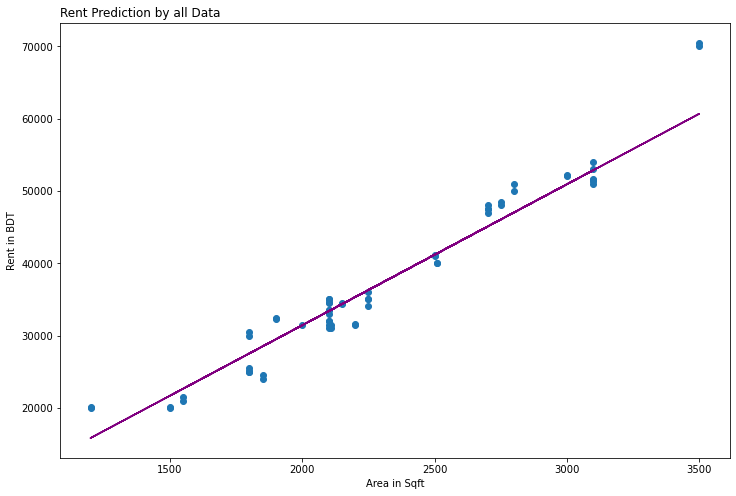

In [35]:
# Visualization with all data
plt.figure(figsize=(12,8))
plt.scatter(df['area'], df['rent'], marker='o')                   # Actual
plt.plot(df[['area']], lr.predict(df[['area']]), color='purple')  # Prediction by all data, for all must work on 'area'
plt.xlabel('Area in Sqft')
plt.ylabel('Rent in BDT')
plt.title('Rent Prediction by all Data', loc='left')
plt.show()

#### Accuracy

In [36]:
lr.score(xtest, ytest) # R Squred Value - test data

0.9317968633780175

In [37]:
lr.score(df[['area']], df.rent)  # R Squred value - full dataset

0.9431522770273515

In [38]:
lr.score(xtrain, ytrain) # R Squred value - Train Data

0.9411024500830101